# 주제 : 선형 회귀분석을 이용하여 다이아몬드 가격 예측

## Feature 설명   
price : price in US dollars (\$326--\$18,823)    
carat : weight of the diamond (0.2--5.01)   
cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)    
color : diamond colour
clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  
length : length in mm (0--10.74)   
width : width in mm (0--58.9)  
depth : depth in mm (0--31.8)  
depth_per : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)   
table : width of top of diamond relative to widest point (43--95)   

**target => price**

In [1]:
import pandas as pd
df = pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth_per,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth_per  53940 non-null  float64
 5   table      53940 non-null  float64
 6   length     53940 non-null  float64
 7   width      53940 non-null  float64
 8   depth      53940 non-null  float64
 9   price      53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**결측치 확인) 전체 53940개의 데이터 중 모든 열에 대하여 non-null 값이 53940개 이므로   
=>누락데이터가 없음이 확인 가능하다.**

In [3]:
df = df[(df[['length', 'width', 'depth']] != 0).all(axis=1)]
df

,carat,cut,color,clarity,depth_per,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


**이상치 확인) length, width, depth 중 0 값이 있으면 무차원 또는 2차원 다이아몬드가 있다는 것을 의미   
=> 이상치 값이므로 제거 (20개 제거)**


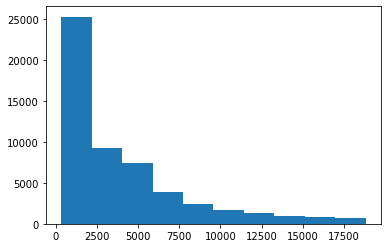

In [4]:
#price 값 히스토그램으로 분포 확인
import matplotlib.pyplot as plt
plt.hist(df['price'])
plt.show()

## categorical한 변수들  numerical한 변수로 변환하기 
### 1) 'cut', 'clarity' 는 순서형 변수 이므로 ->  Label Encoding

In [5]:
df['cut'].replace(['Ideal','Fair','Good','Very Good','Premium'],[0,1,2,3,4], inplace=True)

C:\Users\JooYeSeo\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [6]:
df['clarity'].replace(['SI1','SI2','I1','IF','VS1','VS2','VVS1','VVS2'],[0,1,2,3,4,5,6,7], inplace=True)

### 2) 'color' 는 명목형 변수이므로 -> One-Hot Encoding

In [7]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

**'color' 의 unique한 변수가 총 7개로, one-hot encoding 시 독립변수가 너무 많아짐을 고려하여,   
'color'열을 삭제하기로 하였다.**

In [8]:
df = df.drop(labels = 'color', axis=1)
df

,carat,cut,clarity,depth_per,table,length,width,depth,price
0,0.23,0,1,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4,0,59.8,61.0,3.89,3.84,2.31,326
2,0.23,2,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,2,1,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,2,0,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,3,0,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,4,1,61.0,58.0,6.15,6.12,3.74,2757


## #1. 종속변수와 상관관계가 높은 변수들의 outlier 제거

In [9]:
df_corr = df.corr()['price'].sort_values(ascending=False)
df_corr

price        1.000000
carat        0.921592
length       0.887231
depth        0.868206
width        0.867864
table        0.127245
cut          0.105050
depth_per   -0.010729
clarity     -0.099860
Name: price, dtype: float64

In [10]:
df_corr_feats = df_corr.index[1:5]
df_corr_feats

Index(['carat', 'length', 'depth', 'width'], dtype='object')

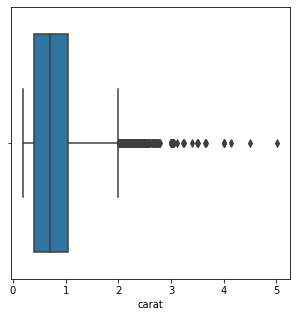

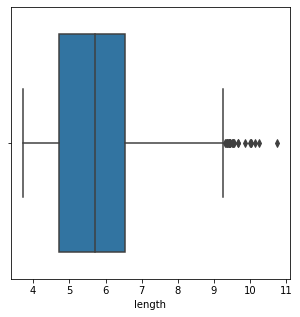

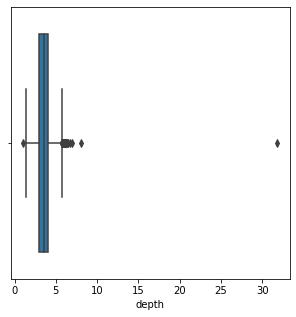

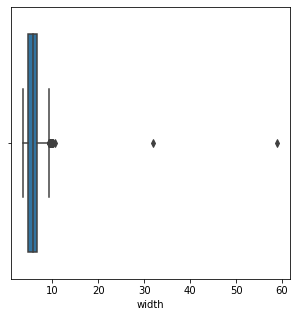

In [11]:
import seaborn as sns
for feat in df_corr_feats:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=feat, data=df)
    plt.xlabel(feat)

### => "Price"와 변수들간의 상관계수를 확인하고 그 값이 높은 변수들을 Boxplot 으로 확인

In [12]:
df = df[(df["length"]<30)]
df = df[(df["width"]<30)]
df = df[(df["depth"]<30)&(df["depth"]>2)]
df

,carat,cut,clarity,depth_per,table,length,width,depth,price
0,0.23,0,1,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4,0,59.8,61.0,3.89,3.84,2.31,326
2,0.23,2,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,2,1,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,2,0,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,3,0,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,4,1,61.0,58.0,6.15,6.12,3.74,2757


### => 상관관계가 높은 변수들 안에서 정확도를 향상 시키기 위해 이상치 제거

### 앞서 전처리한 데이터들로 Linear Regression 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X= df.drop(["price"],axis =1)
y= df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([ 1.05469721e+04,  4.48021355e+00,  2.19623240e+02,  1.33643603e+02,
       -7.31260583e+01, -1.75268074e+03,  3.77060668e+03, -4.94193046e+03])

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [17]:
mean_squared_error(y_train_pred , y_train) , mean_squared_error(y_test_pred , y_test)

(1967388.0774850924, 1863887.21783414)

In [18]:
print('train R^2: ',r2_score(y_train_pred , y_train) , ', test R^2: ',r2_score(y_test_pred , y_test))

train R^2:  0.8584793102101964 , test R^2:  0.8669572386305836


## #2. adjust-r2 값을 사용해서 성능향상

In [19]:
print("Train Adjusted R^2:",1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Test Adjusted R^2:",1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Train Adjusted R^2: 0.875999886001845
Test Adjusted R^2: 0.8833021267066326


## #3. Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 특성 생성
poly = PolynomialFeatures(degree=2)  # 2차 다항식 사용 (필요에 따라 차수 조정 가능)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y,test_size=0.25, random_state=7)

# 다항 회귀 모델 정의 및 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 학습 데이터에 대한 예측
y_train_pred = model.predict(X_train_poly)

# 테스트 데이터에 대한 예측
y_test_pred = model.predict(X_test_poly)

# 성능 평가 (MSE 및 R2 스코어)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Train MSE: 1517138.5991861238
Test MSE: 1519804.0474851388
Train R^2 Score: 0.9043970327049468
Test R^2 Score: 0.9049016346401993


## #4. Lasso Regression 을 사용하여 변수 선택

In [21]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("Ridge : " ,ridge.coef_)

Ridge :  [ 1.05112563e+04  4.38950954e+00  2.19769412e+02  1.19222369e+02
 -7.32033144e+01 -1.77094454e+03  3.64857849e+03 -4.69092218e+03]


In [22]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print("Lasso : ",lasso.coef_)

Lasso :  [ 1.03465304e+04  4.31445942e-01  2.20940041e+02  1.31446894e+01
 -7.51001203e+01 -1.27477026e+03  2.12677092e+03 -2.92588278e+03]


C:\Users\JooYeSeo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.654e+09, tolerance: 6.417e+07
  model = cd_fast.enet_coordinate_descent(


**table, length, depth 변수의 계수가 0 에 가까워졌으므로, 위 3개의 변수들을 삭제 후 다시 Linear Regression**

In [23]:
lasso_X = df.drop(["table","length", "depth"],axis =1)
lasso_y= df["price"]
    
lasso_X_train, lasso_X_test, lasso_y_train, lasso_y_test = train_test_split(lasso_X, lasso_y,test_size=0.25, random_state=7)
lasso_model = LinearRegression()
lasso_model.fit(lasso_X_train, lasso_y_train)


lasso_y_train_pred = lasso_model.predict(lasso_X_train)
lasso_y_test_pred = lasso_model.predict(lasso_X_test)
    
print('lasso_train_MSE : ',mean_squared_error(lasso_y_train_pred , lasso_y_train) ,f'lasso_test_MSE : ', mean_squared_error(lasso_y_test_pred , lasso_y_test))
print(f'lasso_train_r2 : ',r2_score(lasso_y_train_pred , lasso_y_train) , f'lasso_test_r2 : ',r2_score(lasso_y_test_pred , lasso_y_test))

lasso_train_MSE :  9.874204858256709e-25 lasso_test_MSE :  9.461258930067185e-25
lasso_train_r2 :  1.0 lasso_test_r2 :  1.0


## #5. 다중공선성 유발하는 변수들 제거

**다중공선성 : 독립 변수들 간에 높은 상관 관계가 있을 때 발생하는 문제**

<AxesSubplot:>

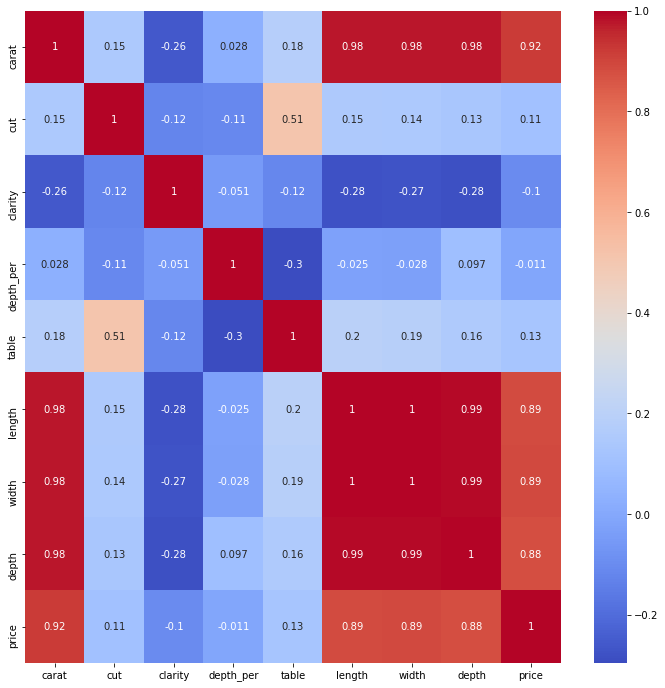

In [24]:
# 변수들간의 상관관계 히트맵으로 시각화
cmap = 'coolwarm' 
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True)

**히트맵 확인 결과 carat과 length, width, depth 간의 상관관계가 매우 높음   
=>이 변수들을 제거**

In [25]:
corr_X = df.drop(["length", "depth", "width"],axis =1)
corr_y= df["price"]
    
corr_X_train, corr_X_test, corr_y_train, corr_y_test = train_test_split(corr_X, corr_y,test_size=0.25, random_state=7)
corr_model = LinearRegression()
corr_model.fit(corr_X_train, corr_y_train)


corr_y_train_pred = corr_model.predict(corr_X_train)
corr_y_test_pred = corr_model.predict(corr_X_test)
    
print('corr_train_MSE : ',mean_squared_error(corr_y_train_pred , corr_y_train) ,f'corr_test_MSE : ', mean_squared_error(corr_y_test_pred , corr_y_test))
print(f'corr_train_r2 : ',r2_score(corr_y_train_pred , corr_y_train) , f'corr_test_r2 : ',r2_score(corr_y_test_pred , corr_y_test))

corr_train_MSE :  3.351821048853498e-24 corr_test_MSE :  3.2151255509012458e-24
corr_train_r2 :  1.0 corr_test_r2 :  1.0
